# **MTH377: *Convex Optimization Assessment-2***

In [1]:
import warnings
warnings.filterwarnings("ignore")

## **Prisoners' Dilemma as a Bargaining Problem**

This assessment deals with a two-player Prisoners' Dilemma, in which the cooperative payoff possibilities are mathematically described by a polytope $P$ in $\mathbb{R}^{2}$, the convex hull of the payoff vectors $(4, 4)$, $(6, 0)$, $(0, 6)$, and $(0, 0)$.

Assume that the disagreement point is $\mathbf{d} = (d_{1}, d_{2})$.
The notion of a disagreement point introduces the constraint that player $i$ cannot get a payoff below their disagreement point $d_{i}$.

Hence, the feasible set $\mathcal{F}$ of payoff vectors $\mathbf{u} = (u_{1}, u_{2})$ for the problem is mathematically described by the inequalities:

$$\begin{align*}
    u_{1} + 2u_{2} &\leq 12 \\
    2u_{1} + u_{2} &\leq 12 \\
    \mathbf{u} &\geq \mathbf{d} 
\end{align*}$$

In [2]:
import cvxpy
import numpy as np
import numdifftools as nd
from typing import Callable
import matplotlib.pyplot as plt

# Type Aliases
Vector = list[float, float]
Point = list[float, float]
Function = Callable[[Point], float]

### **The Problem Domain $P$**

The polytope $P$ containing the cooperative payoff possibilities is the convex hull of the vertices $(4, 4)$, $(6, 0)$, $(0, 6)$, and $(0, 0)$.
$P$ is shown in the figure generated below (The interior of the polygon).

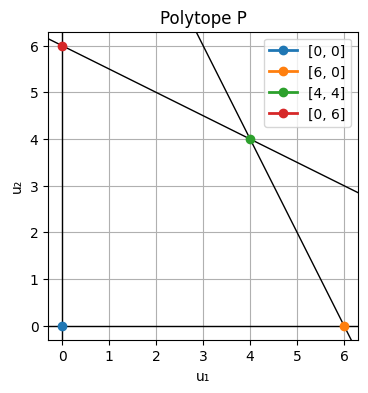

In [3]:
plt.figure(figsize=(4, 4))

points = [[0, 0], [6, 0], [4, 4], [0, 6]]
p1, p2, p3, p4 = points

plt.axline(p1, p2, color="black", linewidth=1)
plt.axline(p2, p3, color="black", linewidth=1)
plt.axline(p3, p4, color="black", linewidth=1)
plt.axline(p4, p1, color="black", linewidth=1)

for point in points:
    plt.plot(point[0], point[1], marker="o", label=point, linewidth=2)

plt.title("Polytope P")
plt.xlabel("u₁")
plt.ylabel("u₂")
plt.grid(True)
plt.legend()
plt.show()

### **Problem Setup**

The following code cell defines all necessary variables and objects for the problem.

In [4]:
# Define the variables and parameters
u1 = cvxpy.Variable()
u2 = cvxpy.Variable()
theta = cvxpy.Parameter()

## **Problem: 1 (5 Points)**

This problem requires us to perform Linear Optimization using the $\texttt{cvxpy}$ Python library.

Given that $W$ is a weighted utilitarian criterion defined for the problem, the following information is known:

$$\begin{align*}
    \mathbf{d} &= (3.5, 2) \\
    W(\mathbf{u}) &= \theta u_{1} + (1 - \theta)u_{2}, \ \theta \in [0, 1]
\end{align*}$$

We are required to find the weighted utilitarian solution of the bargaining problem, which is the linear optimization problem:

$$\max_{\mathbf{u} \in \mathcal{F}} W(\mathbf{u}) = \max_{\mathbf{u} \in \mathcal{F}} \ \theta u_{1} + (1 - \theta)u_{2}, \ \theta \in [0, 1]$$

In [5]:
# Define the constraints
d = d1, d2 = [3.5, 2]
constraints = [
    u1 + 2*u2 <= 12, 2*u1 + u2 <= 12,
    u1 >= d1, u2 >= d2
]

In [6]:
# Define the objective function
W = cvxpy.Maximize(theta * u1 + (1 - theta) * u2)

In [7]:
# Solve the problem for a range of theta values
samples: int = 275

t = np.linspace(0, 1, samples)
soln = np.zeros(samples)

for i in range(samples):
    theta.value = t[i]
    problem = cvxpy.Problem(W, constraints)
    problem.solve()
    soln[i] = u1.value

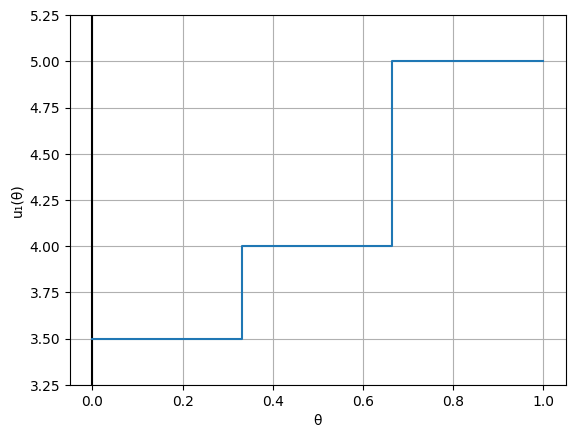

In [8]:
# Plot the function
plt.axvline(x=0, color="black", linewidth=1.5)
plt.step(t, soln)
plt.xlabel("θ")
plt.ylabel("u₁(θ)")
plt.ylim(3.25, 5.25)
plt.grid(True)
plt.show()

## **Problem: 2 (8 Points)**

This problem requires us to perform Convex Optimization using the $\texttt{cvxpy}$ Python library.

Given that $N$ is a Nash welfare criterion defined for the problem, the following information is known:

$$\begin{align*}
    \mathbf{d} &= (3.5, 2) \\
    N(\mathbf{u}) &= \log{(u_{1} - d_{1})} + \log{(u_{2} - d_{2})}
\end{align*}$$

We are required to find the Nash welfare solution of the bargaining problem, which is the convex optimization problem:

$$\max_{\mathbf{u} \in \mathcal{F}} N(\mathbf{u}) = \max_{\mathbf{u} \in \mathcal{F}} \ \log{(u_{1} - d_{1})} + \log{(u_{2} - d_{2})}$$

### **Part (a)**

Find the Nash welfare solution for the bargaining problem and display the solution for $N(\mathbf{u})$, along with the primal optimal value $N(\mathbf{u}^{*})$ and the optimal values of the dual variables for the constraints.

In [9]:
# Define the constraints
d = d1, d2 = [3.5, 2]
constraints = [
    u1 + 2*u2 <= 12, 2*u1 + u2 <= 12,
    u1 >= d1, u2 >= d2
]

In [10]:
# Define the objective function
N = cvxpy.Maximize(cvxpy.log(u1 - d1) + cvxpy.log(u2 - d2))

In [11]:
problem = cvxpy.Problem(N, constraints)
problem.solve()

u = [round(eval(f"u{i}.value.item()"), 5) for i in range(1, 3)]
dual = [round(constraint.dual_value, 5) for constraint in constraints]

In [12]:
print("Nash Bargaining Solution: N =", problem.value)
print("Primal Optimal Solution: u =", u)

Nash Bargaining Solution: N = 0.11778302005591901
Primal Optimal Solution: u = [4.25, 3.5]


In [13]:
print("Optimal Dual Variables:")
print("u₁ + 2u₂ <= 12: λ₁ =", dual[0])
print("2u₂ + u₁ <= 12: λ₂ =", dual[1])
print("u₁ >= d₁: λ₃ =", dual[2])
print("u₂ >= d₂: λ₄ =", dual[3])

Optimal Dual Variables:
u₁ + 2u₂ <= 12: λ₁ = 0.0
2u₂ + u₁ <= 12: λ₂ = 0.66667
u₁ >= d₁: λ₃ = 0.0
u₂ >= d₂: λ₄ = 0.0


### **Part (b)**

Fixing the disagreement payoff of player 2 at $d_{2} = 2$, plot how both player's payoffs in Nash bargaining vary as $d_{1}$ varies over the interval $[2, 5]$.

In [14]:
# Define the objective function and solve it for a range of d1
samples: int = 500
d2: float = 2.0

d1 = np.linspace(2, 5, samples)
soln = np.zeros((samples, 2))

for i in range(samples):
    constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= d1[i], u2 >= d2]
    N = cvxpy.Maximize(cvxpy.log(u1 - d1[i]) + cvxpy.log(u2 - d2))
    problem = cvxpy.Problem(N, constraints)
    problem.solve(solver=cvxpy.SCS)
    soln[i] = [u1.value.item(), u2.value.item()]

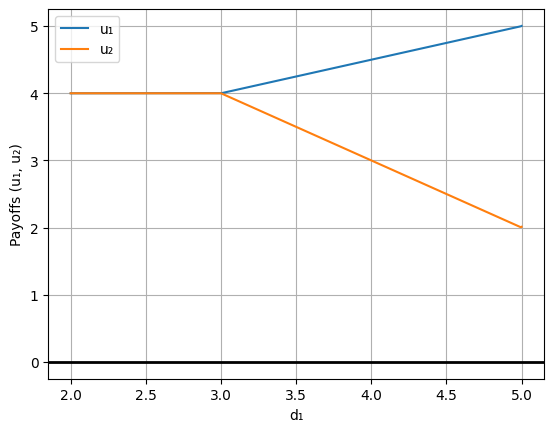

In [15]:
# Plot the payoffs for the range of d1
plt.axhline(y=0, color="black", linewidth=2)
plt.plot(d1, soln[:, 0], label="u₁")
plt.plot(d1, soln[:, 1], label="u₂")
plt.xlabel("d₁")
plt.ylabel("Payoffs (u₁, u₂)")
plt.grid(True)
plt.legend()
plt.show()

## **Problem: 3 (7 Points)**

This problem involves the use of the Interior Point Algorithm that uses the log barrier for inequality constraints to solve the convex optimization problem given in Problem $2 (a)$.

The algorithm from the lecture notes titled [Interior Point Algorithm](https://drive.google.com/file/d/1jFJX2L_EpDsXxl5Ls_m-4yGepWobCusT/view) has been followed to solve this problem.

Given the following information

$$\begin{align*}
    \mathbf{d} &= (2, 1) \\
    N(\mathbf{u}) &= \log{(u_{1} - d_{1})} + \log{(u_{2} - d_{2})}
\end{align*}$$

where $N(\mathbf{u})$ is the Nash welfare function for the payoff vector $\mathbf{u} = (u_{1}, u_{2})$.

In [16]:
# N as a function of d
def generate_N(d: Vector) -> Function:
    return (lambda u: log(u[0] - d[0]) + log(u[1] - d[1]))
    

# Line Search Algorithm
def line_search(F: Function, x: Point, d: Vector, alpha: float, beta: float) -> float:
    """
    Line Search Algorithm to find the optimal step size.
    :param F: the function to find the minimum of
    :param x: the current point
    :param d: the direction to move in
    :param alpha: the descent parameter
    :param beta: the reduction factor
    :return t: the optimal step size
    """

    t = 1
    while F(x) - F(x + t*d) < alpha*np.dot(-nd.Gradient(F)(x), t*d):
        t = beta * t
    return t


# Newton Descent Algorithm
def newton_descent(F: Function, x0: Point, line: list[float, float], eta: float) -> float:
    """
    Newton Descent Algorithm to find the minimum of a function.
    :param F: the function to find the minimum of
    :param x0: the initial point/guess to start from
    :param line: the parameters [alpha, beta] for the Line Search Algorithm:
        :param line.alpha: the descent parameter for line search
        :param line.beta: the reduction factor for line search
    :param eta: the tolerance
    :return point: the point at which the function is minimized
    """

    x, diff = x0, np.inf
    while np.linalg.norm(grad := nd.Gradient(F)(x)) > eta and diff > 1e-25:
        d = np.linalg.inv(nd.Hessian(F)(x)) @ (-grad)
        t = line_search(F, x, d, *line)
        x = x + t*d
        diff = np.linalg.norm(t*d)
    return x

In [17]:
# Interior Point Algorithm
class InteriorPoint:
    """
    Implements the Interior Point Algorithm for convex optimization of an objective function.
    :attrs:
        F: the objective function
        fi: the list of inequality constraints (as equality functions) [fi(x) < 0]
        minimize: a boolean indicating whether to minimize or maximize F [True indicates minimize, False indicates maximize] [default: True]
        m: the number of inequality constraints
        B: the log barrier function
    """

    def __init__(self, F: Function, fi: list[Function], minimize: bool = True):
        self.minimize = minimize
        self.F = F if self.minimize else lambda x: -F(x)
        self.fi = fi
        self.m = len(fi)
        self.B = lambda x: -np.sum([log(-f(x)) for f in fi])
    
    def solve(self, x0: Point, t0: float, mu: float, newton: list[list[float], float], eta: float) -> None:
        """
        Solves the optimization problem using the Interior Point Algorithm.
        :param x0: the initial point/guess to start from
        :param t0: the initial value of accuracy parameter
        :param mu: the accuracy multiplier
        :param newton: the parameters [line, eta] for the Newton Descent Algorithm:
            :param newton.line: the parameters [alpha, beta] for the Line Search Algorithm:
                :param newton.line.alpha: the descent parameter for line search
                :param newton.line.beta: the reduction factor for line search
            :param newton.eta: the tolerance       
        :param eta: the tolerance
        """
        
        x, t = x0, t0
        while self.m / t > eta:
            t = mu * t
            x = newton_descent(lambda u: t*self.F(u) + self.B(u), x, *newton)

        self.final_t = t
        self.solution = x
        self.value = self.F(x) if self.minimize else -self.F(x)
        self.dual = [1 / self.final_t*self.fi[i](x) for i in range(self.m)]

In [18]:
# Define the constraints and objective function
d = d1, d2 = [2, 1]
N = generate_N(d)
constraints = [
    lambda u: u[0] + 2*u[1] - 12,
    lambda u: 2*u[0] + u[1] - 12,
    lambda u: d1 - u[0],
    lambda u: d2 - u[1]
]

In [19]:
def log(x):
    return np.log(x) if x > 0 else -1e+100

In [20]:
x0: Point = [3, 3]
t0: float = 5.0
mu: float = 15.0
newton: list[list[float], float] = [[0.1, 0.5], 1e-5]
eta: float = 1e-5

problem = InteriorPoint(N, constraints, minimize=False)
problem.solve(x0, t0, mu, newton, eta)

In [21]:
print("Nash Bargaining Solution: u =", problem.solution)
print("Maximized Nash Welfare:", problem.value)

Nash Bargaining Solution: u = [3.9899707  3.99433305]
Maximized Nash Welfare: 1.784841433808697


In [22]:
print("Optimal Dual Variables:")
print("u₁ + 2u₂ - 12 <= 0: λ₁ =", problem.dual[0])
print("2u₂ + u₁ - 12 <= 0: λ₂ =", problem.dual[1])
print("d₁ - u₁ <= 0: λ₃ =", problem.dual[2])
print("d₂ - u₂ <= 0: λ₄ =", problem.dual[3])

Optimal Dual Variables:
u₁ + 2u₂ - 12 <= 0: λ₁ = -5.6265235431853925e-09
2u₂ + u₁ - 12 <= 0: λ₂ = -6.775453255764799e-09
d₁ - u₁ <= 0: λ₃ = -5.241075102039677e-07
d₂ - u₂ <= 0: λ₄ = -7.886309255132549e-07


In [23]:
print("Accuracy Parameter:")
print("Initial t (t₀) =", t0)
print("Final t (t*) =", problem.final_t)

Accuracy Parameter:
Initial t (t₀) = 5.0
Final t (t*) = 3796875.0


In [24]:
print("Inequality Constraint Values at Solution:")
print("u₁ + 2u₂ - 12 <= 0:", constraints[0](problem.solution))
print("2u₂ + u₁ - 12 <= 0:", constraints[1](problem.solution))
print("d₁ - u₁ <= 0:", constraints[2](problem.solution))
print("d₂ - u₂ <= 0:", constraints[3](problem.solution))

Inequality Constraint Values at Solution:
u₁ + 2u₂ - 12 <= 0: -0.021363206578032035
2u₂ + u₁ - 12 <= 0: -0.02572554908048197
d₁ - u₁ <= 0: -1.9899707028056897
d₂ - u₂ <= 0: -2.994333045308139
